# This code illustrates a very simple implementation of a linear Support Vector Machine for classification

# Presented by Ikenna Ivenso

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import scatter, show, legend, xlabel, ylabel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.svm import SVC

In [2]:
#load the dataset (assumes that the last column contains the labels)
theData = np.loadtxt('ex2data1.txt', delimiter=',')

X = theData[:, 0:-1]
y = theData[:, -1]
posLabels = np.where(y == 1)
negLabels = np.where(y == 0)

In [3]:
[np.shape(X), np.shape(y)]

[(100, 2), (100,)]

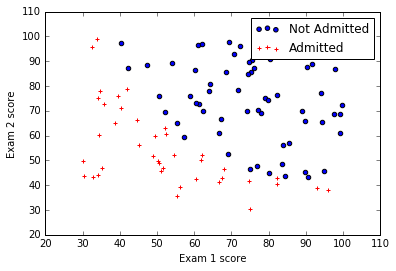

In [4]:
# plot the dataset
scatter(X[posLabels, 0], X[posLabels, 1], marker='o', c='b')
scatter(X[negLabels, 0], X[negLabels, 1], marker='+', c='r')

xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

In [5]:
# setup up K-Fold cross validation
num_K_Folds = 3
num_instances = len(X)
randSeed = np.random.randint(1,10)
kfold = cross_validation.KFold(n=num_instances, n_folds=num_K_Folds, random_state=randSeed)

penalties=map(lambda x: x*0.01,range(1,31))
scores=[]

#...get optimal value of penalty term for SVC (based on F1-Scores)
for i in penalties:
    theModel = SVC(C=i,kernel='linear')
    results = cross_validation.cross_val_score(theModel, X, y, scoring='f1', cv=kfold)
    scores.append(results.max())

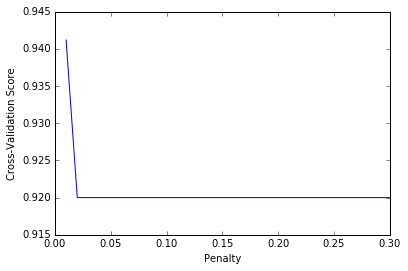

In [6]:
# plot penalties VS cross-validation scores
plt.figure()
plt.xlabel("Penalty")
plt.ylabel("Cross-Validation Score")
plt.plot(penalties, scores)
plt.show()

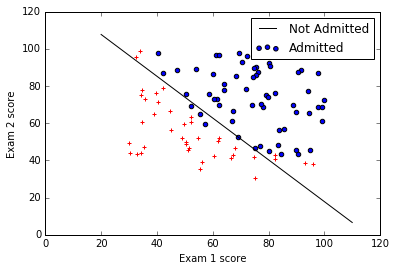

In [7]:
theModel = SVC(C=0.01,kernel='linear')
theModel.fit(X,y)

w = theModel.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(20, 110)
yy = a * xx - (theModel.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

scatter(X[posLabels, 0], X[posLabels, 1], marker='o', c='b')
scatter(X[negLabels, 0], X[negLabels, 1], marker='+', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])

plt.show()